# Zillow Clustering Project 

##### Imports:

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data Handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Wrangle file to acquire and clean Zillow data
import wrangle_zillow as wr

# Explore file
import explore as ex

## Acquire:

In [2]:
zillow = wr.wrangle_zillow()
zillow.head(3)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,yearbuilt,taxvaluedollarcnt,logerror,transactiondate,heatingorsystemdesc,county
0,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,1998.0,1023282.0,0.025595,2017-01-01,None,Orange
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,1967.0,464000.0,0.055619,2017-01-01,None,Ventura
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,1962.0,564778.0,0.005383,2017-01-01,None,Orange


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70910 entries, 0 to 77380
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   70910 non-null  float64
 1   bedroomcnt                    70910 non-null  float64
 2   calculatedfinishedsquarefeet  70910 non-null  float64
 3   fips                          70910 non-null  float64
 4   latitude                      70910 non-null  float64
 5   longitude                     70910 non-null  float64
 6   yearbuilt                     70910 non-null  float64
 7   taxvaluedollarcnt             70910 non-null  float64
 8   logerror                      70910 non-null  float64
 9   transactiondate               70910 non-null  object 
 10  heatingorsystemdesc           70910 non-null  object 
 11  county                        70910 non-null  object 
dtypes: float64(9), object(3)
memory usage: 7.0+ MB


### Train, Validate, Test Split

In [4]:
train, validate, test = wr.train_validate_test_split(zillow)
print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  510552
validate observations:  170184
test observations:  170184


## Explore:

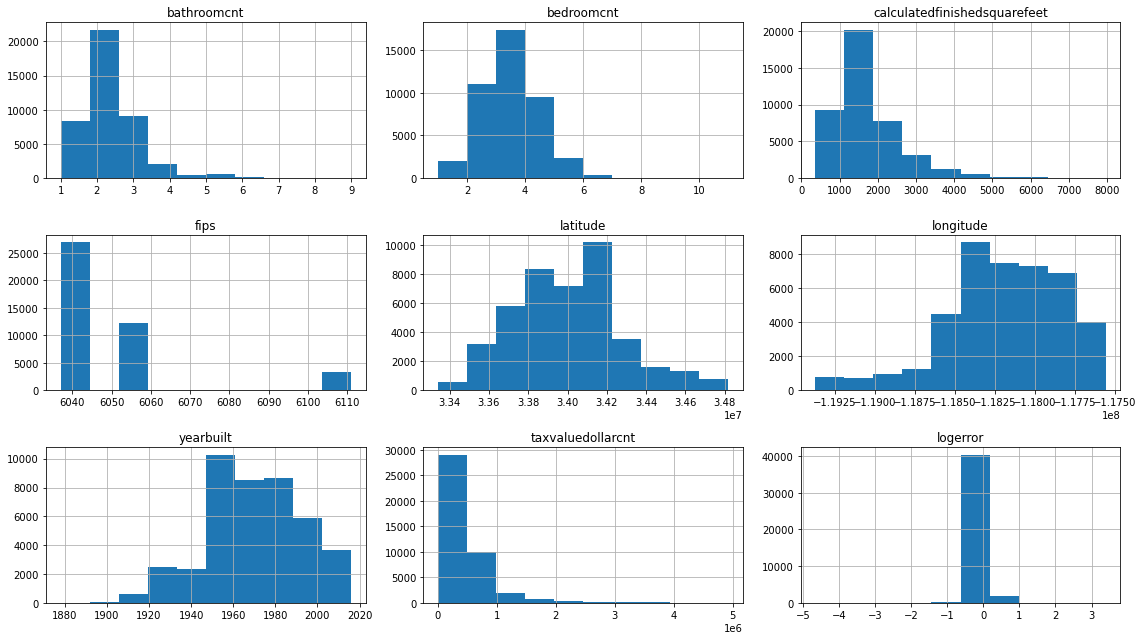

In [5]:
train.hist(figsize=(16,9))
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(train.drop(columns='fips'), corner=True)
plt.show()

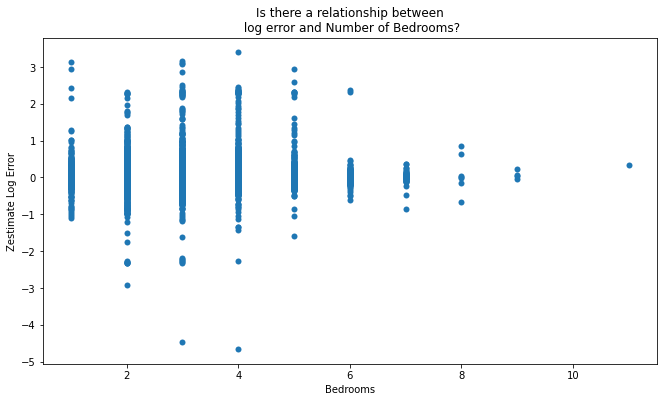

In [6]:
# Plot of log error vs number of bedrooms
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(x="bedroomcnt", y="logerror",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)
plt.title('Is there a relationship between\n log error and Number of Bedrooms?')
plt.xlabel('Bedrooms')
plt.ylabel('Zestimate Log Error')
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

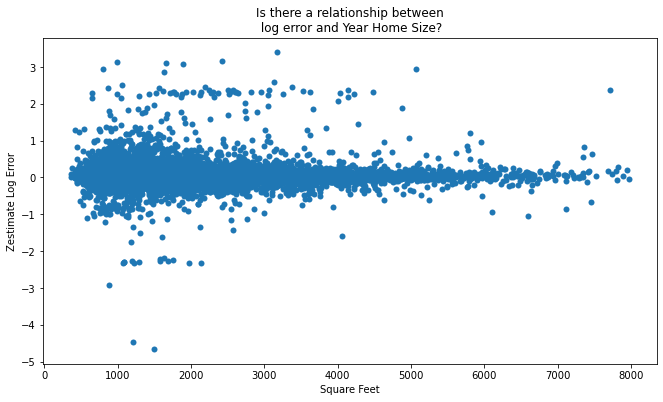

In [7]:
# Plot of log error vs square feet
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(x="calculatedfinishedsquarefeet", y="logerror",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)
plt.title('Is there a relationship between\n log error and Year Home Size?')
plt.xlabel('Square Feet')
plt.ylabel('Zestimate Log Error')
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

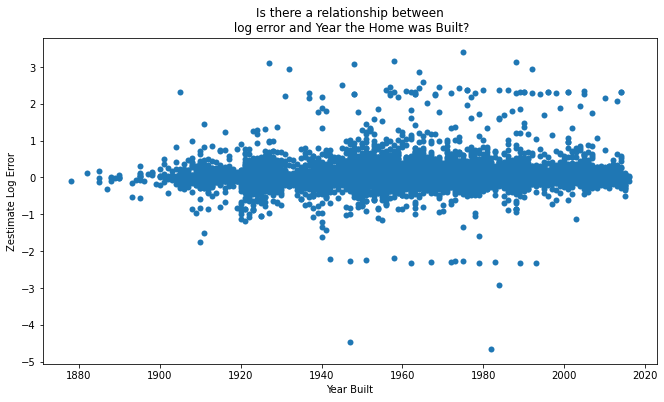

In [8]:
# Plot of log error vs year built
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(x="yearbuilt", y="logerror",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)
plt.title('Is there a relationship between\n log error and Year the Home was Built?')
plt.xlabel('Year Built')
plt.ylabel('Zestimate Log Error')
ax.xaxis.set_major_formatter('{:.0f}'.format)
plt.show()

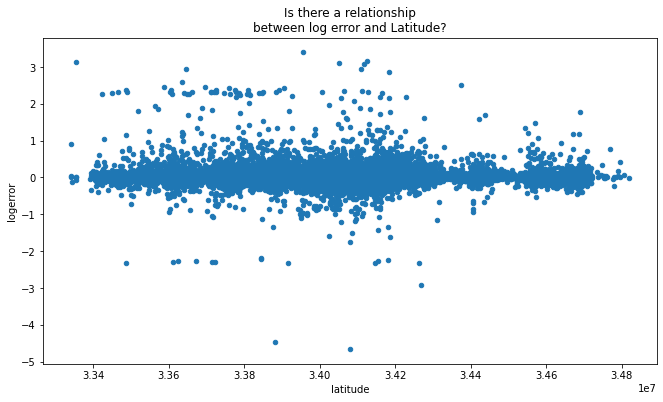

In [9]:
train.plot.scatter(
    x="latitude",
    y="logerror",
    title='Is there a relationship\nbetween log error and Latitude?',
    figsize=(11, 6)
)
plt.show()

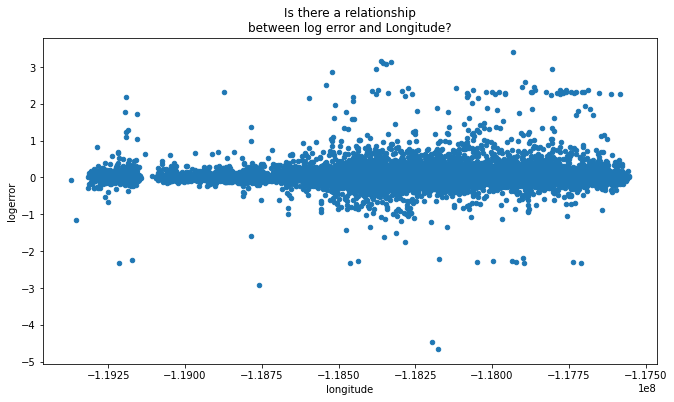

In [10]:
train.plot.scatter(
    x="longitude",
    y="logerror",
    title='Is there a relationship\nbetween log error and Longitude?',
    figsize=(11, 6),
)
plt.show()

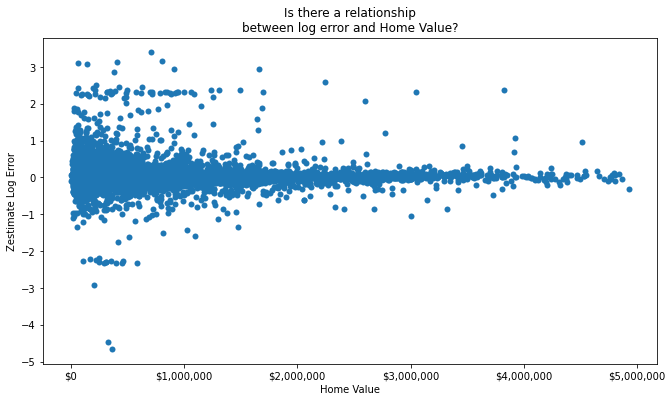

In [11]:
# Plot of log error vs home value
f, ax = plt.subplots(figsize=(11, 6))
sns.scatterplot(x="taxvaluedollarcnt", y="logerror",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)
plt.title('Is there a relationship\nbetween log error and Home Value?')
plt.xlabel('Home Value')
plt.ylabel('Zestimate Log Error')
ax.xaxis.set_major_formatter('${:,.0f}'.format) 

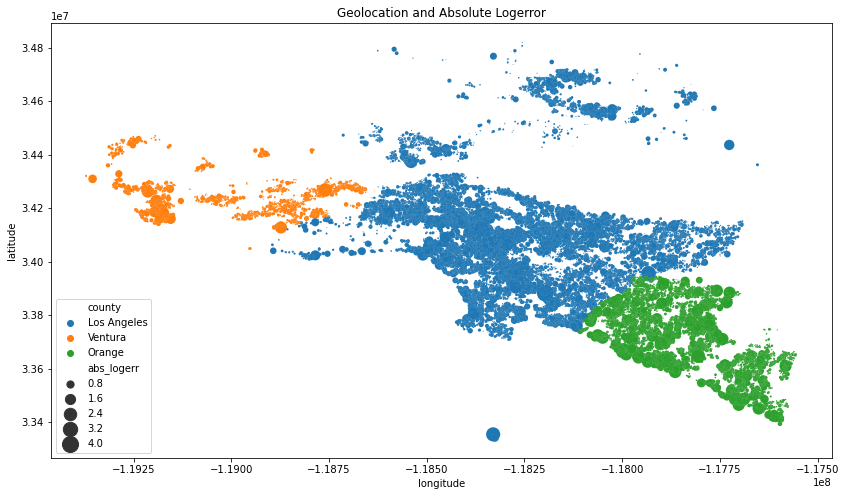

In [13]:
train['abs_logerr'] = train.logerror.apply(lambda x: x if x >= 0 else -x)
# Plot of error using lat/long
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='county', size='abs_logerr', sizes=(0,300), data=train)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()

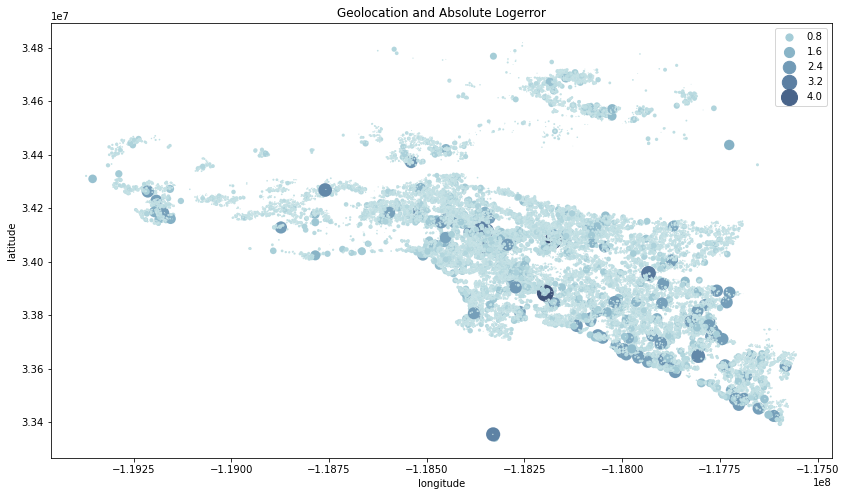

In [21]:
# Plot of error using lat/long
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='abs_logerr', palette="ch:r=-.2,d=.3", size='abs_logerr', sizes=(0,300), data=train)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()

##### Takeaways:
- There seems to be bands of clusters in log error vs above categories
- Lat Long seems to be the most promising to explore via clustering
- Then potentially sqft and beadroom/bathroom count

### Statistics

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42546 entries, 28420 to 47816
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   42546 non-null  float64
 1   bedroomcnt                    42546 non-null  float64
 2   calculatedfinishedsquarefeet  42546 non-null  float64
 3   fips                          42546 non-null  float64
 4   latitude                      42546 non-null  float64
 5   longitude                     42546 non-null  float64
 6   yearbuilt                     42546 non-null  float64
 7   taxvaluedollarcnt             42546 non-null  float64
 8   logerror                      42546 non-null  float64
 9   transactiondate               42546 non-null  object 
 10  heatingorsystemdesc           42546 non-null  object 
 11  county                        42546 non-null  object 
 12  abs_logerr                    42546 non-null  float64
dt

In [15]:
cat_vars = ['heatingorsystemdesc', 'county']
quant_vars = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']
target = 'logerror'

##### Univariate:

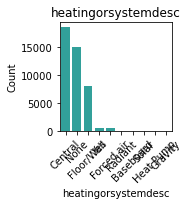

           heatingorsystemdesc  Count  Percent
Central                Central  18507    43.50
None                      None  14967    35.18
Floor/Wall          Floor/Wall   8006    18.82
Yes                        Yes    507     1.19
Forced air          Forced air    473     1.11
Solar                  Radiant     62     0.15
Radiant              Baseboard     14     0.03
Baseboard                Solar      8     0.02
Gravity              Heat Pump      1     0.00
Heat Pump              Gravity      1     0.00
_________________________________________________________________


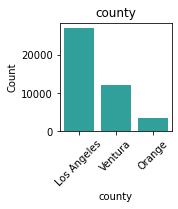

                  county  Count  Percent
Los Angeles  Los Angeles  26957    63.36
Orange           Ventura  12204    28.68
Ventura           Orange   3385     7.96
_________________________________________________________________


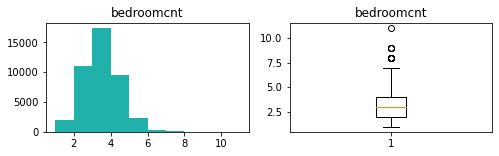

count    42546.000000
mean         3.011117
std          0.994423
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedroomcnt, dtype: float64


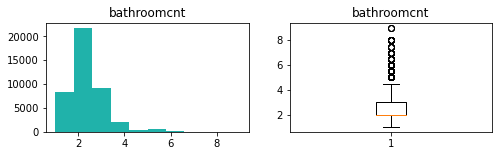

count    42546.000000
mean         2.256452
std          0.913858
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: bathroomcnt, dtype: float64


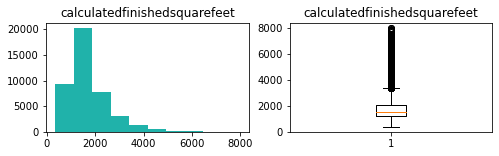

count    42546.000000
mean      1732.957411
std        857.578287
min        360.000000
25%       1164.250000
50%       1510.000000
75%       2052.000000
max       7970.000000
Name: calculatedfinishedsquarefeet, dtype: float64


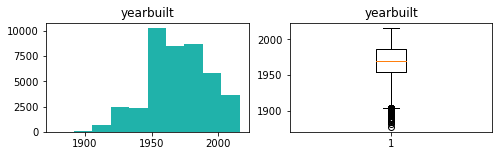

count    42546.000000
mean      1969.233465
std         23.121851
min       1878.000000
25%       1954.000000
50%       1970.000000
75%       1987.000000
max       2016.000000
Name: yearbuilt, dtype: float64


In [16]:
ex.explore_univariate(train, cat_vars, quant_vars)

##### Bivariate:

## Clustering